# Red Wine Quality Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

Veri Seti: https://archive.ics.uci.edu/dataset/186/wine+quality

## Variable Description
1. **fixed acidity** : şarapla ilişkili olan ve uçucu olmayan (kolayca buharlaşmayan) asitlerin çoğu.

2. **volatile acidity** : şaraptaki asetik asit miktarı; çok yüksek seviyelerde hoş olmayan, sirke tadına neden olabilir.

3. **citric acid** : küçük miktarlarda bulunan sitrik asit, şaraba 'tazelik' ve lezzet katabilir.

4. **residual sugar** : fermentasyon durduktan sonraki kalan şeker miktarı; genellikle litre başına 1 gramdan az olan şaraplar nadirdir.

5. **chlorides** : Şaraptaki tuz miktarı.

6. **free sulfur dioxide** : SO2'nin serbest formu, moleküler SO2 (çözünmüş bir gaz olarak) ve bisülfit iyonu arasında denge halindedir; oksidasyonu önler.

7. **total sulfur dioxide** : SO2'nin serbest ve bağlı formlarının toplamı; düşük konsantrasyonlarda, SO2 çoğunlukla şarapta algılanamaz.

8. **density** : alkol ve şeker yüzdesine bağlı olarak suyun yoğunluğu suya yakındır.

9. **ph** : şarabın ne kadar asidik veya bazik olduğunu tanımlar; genellikle 0 (çok asidik) ile 14 (çok bazik) arasında bir ölçekte bulunur; çoğu şarap 3-4 arasındadır.

10. **sulphates** : araba katkı maddesi olan ve sülfür dioksit (SO2) seviyelerine katkıda bulunabilen, antimikrobiyal etkiye sahip.

11. **alcohol** : şarabın alkol içeriğinin yüzdesi.

12. **quality** : Çıkış değişkeni (duyusal verilere dayalı olarak, 0 ile 10 arasında bir puan).

#### **IMPORTING DATASETS**

In [2]:
# Veriyi CSV dosyasına kaydetme
csv_filename = "../data/week-7-data/winequality-red.csv"
data = pd.read_csv(csv_filename, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

#### **VISUALIZATION**

#### pH - quality

In [7]:
data[["pH","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality")

,quality,pH
0,3,3.398000
1,4,3.381509
2,5,3.304949
3,6,3.318072
4,7,3.290754
5,8,3.267222


Asidik şaraplar daha çok beğenilmiş :)

array([[<Axes: title={'center': 'pH'}>]], dtype=object)

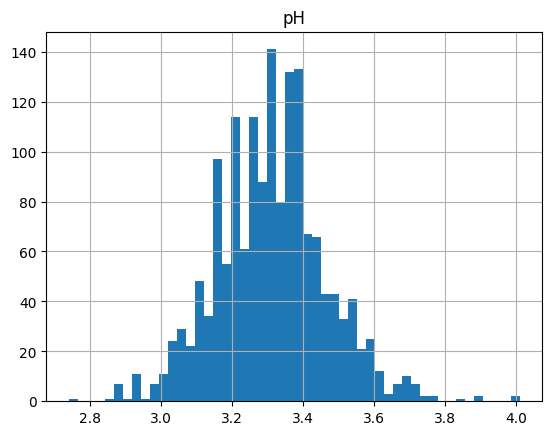

In [8]:
data.hist(column='pH', bins=50)

Çoğu şarap 3-4 arasında ph değerine sahiptir.

<Axes: xlabel='pH', ylabel='density'>

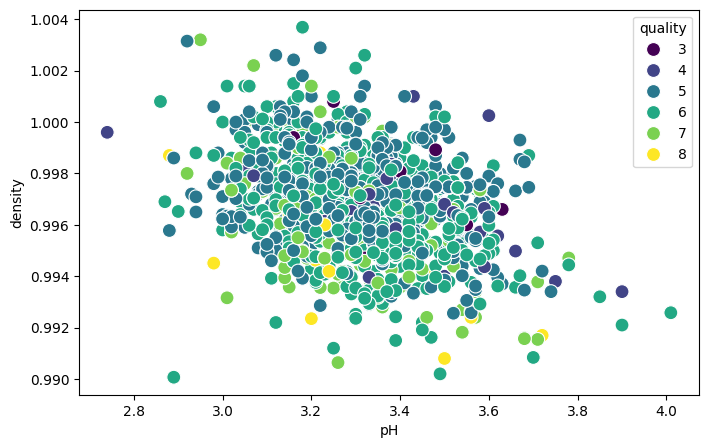

In [9]:
# age and income
plt.figure(figsize=(8,5))
sns.scatterplot(x='pH', y='density', hue='quality', data=data, palette='viridis', s=100)

Değişken kalitesini 0 ve 1 olmak üzere 2 değişkene dönüştürüyoruz.

In [10]:
bins = (2, 5.5, 10) # 2-5.5 arası kötü, 5.5-10 arası iyi
labels = [0, 1]
data['quality'] = pd.cut(x = data['quality'], bins = bins, labels = labels)

In [11]:
data['quality'].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

855 şarap kaliteli, 744 şarap kalitesiz olarak sınıflandırıldı.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [13]:
# Assuming df contains your features (age, income) and target variable
X = data.drop('quality', axis=1)
y = data['quality']  # Target variable

In [14]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [15]:
scaler = StandardScaler()
X_normalized_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [16]:
print('Train set:', X_normalized_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (1279, 11) (1279,)
Test set: (320, 11) (320,)


### Check accuracy of Ks

In [17]:
Ks = 200

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    # Train Model and Predict
    knn = KNeighborsClassifier(n_neighbors=n).fit(X_normalized_train, y_train) # Train the model
    y_pred = knn.predict(X_test) # Make predictions on the test set
    mean_acc[n-1] = accuracy_score(y_test, y_pred) # Evaluate the model using accuracy_score

    std_acc[n-1] = np.std(y_pred == y_test) / np.sqrt(y_pred.shape[0]) # Calculate the standard deviation of the accuracy

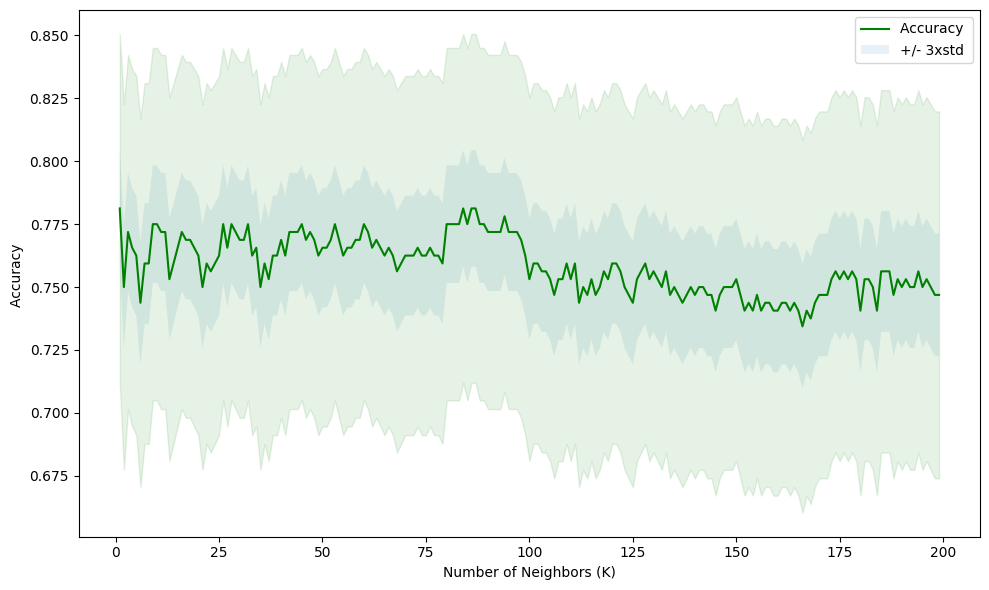

In [18]:
# Plot the model accuracy for a different number of neighbors
plt.figure(figsize=(10, 6))
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1, Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color='green')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [19]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)
# argmax() returns the indices of the maximum values along an axis.

The best accuracy was with 0.78125 with k= 1


### KNeighborsClassifier Confusion Matrix

In [20]:
results = []

Score :  0.78125
KNeighborsClassifier Acc :  0.78125


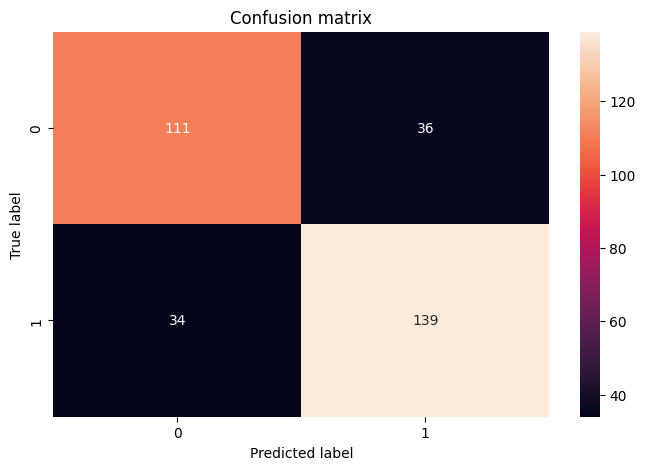

In [21]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_normalized_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)
score = knn.score(X_test, y_test)
results.append(acc)

print("Score : ", score)
print("KNeighborsClassifier Acc : ", acc)

# cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [25]:
print(" \t \t  KNN Classification Report")
print(classification_report(y_test, y_pred))

 	 	  KNN Classification Report
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       147
           1       0.79      0.80      0.80       173

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320



## Evalutaion metrics

In [28]:
from sklearn.metrics import jaccard_score, f1_score, log_loss

#Jaccard index
jaccard_score(y_test, y_pred)

#F1 score
f1_score(y_test, y_pred, average='weighted')

#Log Loss
log_loss(y_test, y_pred)

print("Jaccard index: ", jaccard_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("Log Loss: ", log_loss(y_test, y_pred))

Jaccard index:  0.6650717703349283
F1 score:  0.7811294481184067
Log Loss:  7.884549178869378


**Jaccard index**

**F1 score**

In [29]:
TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

# class = 1
precision_1 = TP / (TP + FP)
recall_1 = TP / (TP + FN)

# class = 0
precision_0 = TP / (TP + FP)
recall_0 = TP / (TP + FN)

In [30]:
print(f"class=0 {precision_0:.2f} {recall_0:.2f}")
print(f"class=1 {precision_1:.2f} {recall_1:.2f}")

class=0 0.76 0.77
class=1 0.76 0.77


In [31]:
f1_score_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0)
f1_score_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1)

In [32]:
print(f"{f1_score_0:.2f}")
print(f"{f1_score_1:.2f}")

0.76
0.76
